# Scrape Data From AMAZON Website Using Python

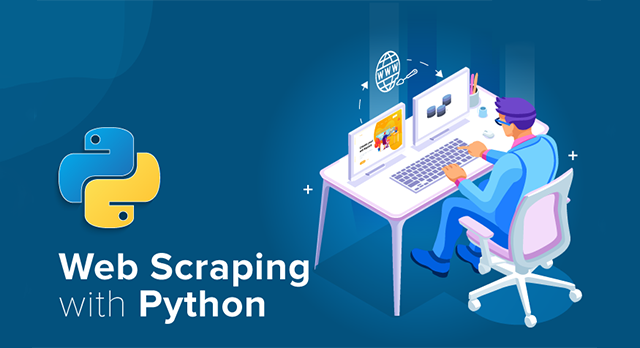

# Why Web Scraping?

# Why Python for Web Scraping?

# How does Web Scraping work?

# 1. Importing Necessary Libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
%matplotlib inline

In [8]:
from bs4 import BeautifulSoup as bs
import requests

In [9]:
link="https://www.amazon.in/Test-Exclusive-549/product-reviews/B077PWBC78/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'"

In [10]:
page = requests.get(link)

In [11]:
page

<Response [200]>

In [12]:
page.content

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n\n<!-- sp:feature:aui-assets -->\n<link rel="stylesheet" href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|012LjolmrML.css,41N8FDnTmPL.css,21qPwhPKAAL.css,01Vctty9pOL.css,017DsKjNQJL.css,01l9iDpr-DL.css,41EWOOlBJ9L.css,11UoGyLuXoL.css,01ElnPiDxWL.css,11QxHU4QYaL.css,01Sp8sB1HiL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,01evdoiemkL.css,01oDR3IULNL.css,31zpKVx8wkL.css,01XPHJk60-L.css,01Jb-VvL4uL.css,21LK7jaicML.css,11L58Qpo0GL.css,21kyTi1FabL.css,01ruG+gDPFL.css,01egbgkonWL.css,21GwE3cR-y

In [13]:
soup = bs(page.content,'html.parser')

In [14]:
print(soup.prettify())

<!DOCTYPE doctype html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:feature:aui-assets -->
  <link href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|012LjolmrML.css,41N8FDnTmPL.css,21qPwhPKAAL.css,01Vctty9pOL.css,017DsKjNQJL.css,01l9iDpr-DL.css,41EWOOlBJ9L.css,11UoGyLuXoL.css,01ElnPiDxWL.css,11QxHU4QYaL.css,01Sp8sB1HiL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,01evdoiemkL.css,01oDR3IULNL.css,31zpKVx8wkL.css,01XPHJk60-L.css,01Jb-VvL4uL.css,21LK7jaicML.css,11L58Qpo0GL.css,21kyTi1FabL.css,01ruG+gDPFL.css,01egbgkonWL.css,21

In [15]:
names = soup.find_all('span',class_='a-profile-name')

In [16]:
names

[<span class="a-profile-name">manish</span>,
 <span class="a-profile-name">Akash peelwa</span>,
 <span class="a-profile-name">Akash peelwa</span>,
 <span class="a-profile-name">manish</span>,
 <span class="a-profile-name">Sayantan Dey</span>,
 <span class="a-profile-name">Janvhi J.</span>,
 <span class="a-profile-name">VINOD SOMVANSHI</span>,
 <span class="a-profile-name">jaspreet</span>,
 <span class="a-profile-name">Arun kumar</span>,
 <span class="a-profile-name">Shubham Kumar</span>,
 <span class="a-profile-name">riaz Khan</span>,
 <span class="a-profile-name">nouman ahmed</span>]

In [17]:
cust_name = []
for i in range(0,len(names)):
    cust_name.append(names[i].get_text())
cust_name

['manish',
 'Akash peelwa',
 'Akash peelwa',
 'manish',
 'Sayantan Dey',
 'Janvhi J.',
 'VINOD SOMVANSHI',
 'jaspreet',
 'Arun kumar',
 'Shubham Kumar',
 'riaz Khan',
 'nouman ahmed']

In [18]:
cust_name.pop(0)

'manish'

In [19]:
cust_name.pop(0)

'Akash peelwa'

In [20]:
cust_name

['Akash peelwa',
 'manish',
 'Sayantan Dey',
 'Janvhi J.',
 'VINOD SOMVANSHI',
 'jaspreet',
 'Arun kumar',
 'Shubham Kumar',
 'riaz Khan',
 'nouman ahmed']

In [21]:
title = soup.find_all('a',class_='review-title-content')

In [22]:
title

[<a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R1XPFOGBHSG8K4?ASIN=B077PWBC78">
 <span>PLZZ read this before Wasting your money.</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/REHA9EV6HHUZQ?ASIN=B077PWBC78">
 <span>osm mobile phone</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R3J7DH5NCMKWOC?ASIN=B077PWBC78">
 <span>Superb Phn and you can go for it.</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R1SR3TST5RX2O9?ASIN=B077PWBC78">
 <span>Good But Not As Expected</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-t

In [23]:
review_title = []
for i in range(0,len(title)):
    review_title.append(title[i].get_text())
review_title

['\nPLZZ read this before Wasting your money.\n',
 '\nosm mobile phone\n',
 '\nSuperb Phn and you can go for it.\n',
 '\nGood But Not As Expected\n',
 '\nFaulty product delivered by Amazon\n',
 '\nGaming beast\n',
 '\nVery nice protect super\n',
 '\nNice Phone But Needs Improvements\n',
 "\nLooks premium but service isn't good\n",
 '\nNot worthy nor upto exp from mi\n']

In [24]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]
review_title

['PLZZ read this before Wasting your money.\n',
 'osm mobile phone\n',
 'Superb Phn and you can go for it.\n',
 'Good But Not As Expected\n',
 'Faulty product delivered by Amazon\n',
 'Gaming beast\n',
 'Very nice protect super\n',
 'Nice Phone But Needs Improvements\n',
 "Looks premium but service isn't good\n",
 'Not worthy nor upto exp from mi\n']

In [25]:
review_title[:] = [titles.rstrip('\n') for titles in review_title]
review_title

['PLZZ read this before Wasting your money.',
 'osm mobile phone',
 'Superb Phn and you can go for it.',
 'Good But Not As Expected',
 'Faulty product delivered by Amazon',
 'Gaming beast',
 'Very nice protect super',
 'Nice Phone But Needs Improvements',
 "Looks premium but service isn't good",
 'Not worthy nor upto exp from mi']

In [26]:
rating = soup.find_all('i',class_='review-rating')
rating

[<i class="a-icon a-icon-star a-star-4 review-rating" data-hook="review-star-rating-view-point"><span class="a-icon-alt">4.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-1 review-rating" data-hook="review-star-rating-view-point"><span class="a-icon-alt">1.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-1 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">1.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-4 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">4.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-4 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">4.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-4 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">4.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-1 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">1.0 out of 5 stars</sp

In [27]:
rate = []
for i in range(0,len(rating)):
    rate.append(rating[i].get_text())
rate

['4.0 out of 5 stars',
 '1.0 out of 5 stars',
 '1.0 out of 5 stars',
 '4.0 out of 5 stars',
 '4.0 out of 5 stars',
 '4.0 out of 5 stars',
 '1.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '4.0 out of 5 stars',
 '1.0 out of 5 stars',
 '2.0 out of 5 stars']

In [28]:
len(rate)

12

In [29]:
rate.pop(0)

'4.0 out of 5 stars'

In [30]:
rate.pop(0)

'1.0 out of 5 stars'

In [31]:
rate

['1.0 out of 5 stars',
 '4.0 out of 5 stars',
 '4.0 out of 5 stars',
 '4.0 out of 5 stars',
 '1.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '4.0 out of 5 stars',
 '1.0 out of 5 stars',
 '2.0 out of 5 stars']

In [32]:
review = soup.find_all("span",{"data-hook":"review-body"})
review

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   PLZZ read this complete information before buying from Amazon<br/>They do not refund if your product got defected.<br/>Amazon is worst in providing services so if you have any option to buy from Flipkart then go there. Don't waste your time on Amazon<br/><br/>Regarding mobile<br/>Worst mobile i have ever seen<br/>Battery charging time is more than expected.<br/>Battery drainaing problem is there<br/>Camera will stuck when you click pictures.<br/>Poor camera quality they said 48 mp but it's like 12mp.  If you are game lover then PLZZ try another mobile. Performance is very low.<br/>I told Amazon customer care to take this product back but they are not helping me instead they want me to go service center in covid19 situation which is in red zone. They can't provide home visit because their technician life is more important than customer. If customer get infected it's ok for them.<br/>Thanks Ama

In [33]:
review_content = []
for i in range(0,len(review)):
    review_content.append(review[i].get_text())
review_content

["\n\n  PLZZ read this complete information before buying from AmazonThey do not refund if your product got defected.Amazon is worst in providing services so if you have any option to buy from Flipkart then go there. Don't waste your time on AmazonRegarding mobileWorst mobile i have ever seenBattery charging time is more than expected.Battery drainaing problem is thereCamera will stuck when you click pictures.Poor camera quality they said 48 mp but it's like 12mp.  If you are game lover then PLZZ try another mobile. Performance is very low.I told Amazon customer care to take this product back but they are not helping me instead they want me to go service center in covid19 situation which is in red zone. They can't provide home visit because their technician life is more important than customer. If customer get infected it's ok for them.Thanks Amazon for this service now i hate Amazon more than tiktok.Unistalling the app right now. And also recommending my friend's and relatives to not 

In [34]:
review_content[:] = [reviews.lstrip('\n') for reviews in review_content]
review_content

["  PLZZ read this complete information before buying from AmazonThey do not refund if your product got defected.Amazon is worst in providing services so if you have any option to buy from Flipkart then go there. Don't waste your time on AmazonRegarding mobileWorst mobile i have ever seenBattery charging time is more than expected.Battery drainaing problem is thereCamera will stuck when you click pictures.Poor camera quality they said 48 mp but it's like 12mp.  If you are game lover then PLZZ try another mobile. Performance is very low.I told Amazon customer care to take this product back but they are not helping me instead they want me to go service center in covid19 situation which is in red zone. They can't provide home visit because their technician life is more important than customer. If customer get infected it's ok for them.Thanks Amazon for this service now i hate Amazon more than tiktok.Unistalling the app right now. And also recommending my friend's and relatives to not buy 

In [35]:
review_content[:] = [reviews.rstrip('\n') for reviews in review_content]
review_content

["  PLZZ read this complete information before buying from AmazonThey do not refund if your product got defected.Amazon is worst in providing services so if you have any option to buy from Flipkart then go there. Don't waste your time on AmazonRegarding mobileWorst mobile i have ever seenBattery charging time is more than expected.Battery drainaing problem is thereCamera will stuck when you click pictures.Poor camera quality they said 48 mp but it's like 12mp.  If you are game lover then PLZZ try another mobile. Performance is very low.I told Amazon customer care to take this product back but they are not helping me instead they want me to go service center in covid19 situation which is in red zone. They can't provide home visit because their technician life is more important than customer. If customer get infected it's ok for them.Thanks Amazon for this service now i hate Amazon more than tiktok.Unistalling the app right now. And also recommending my friend's and relatives to not buy 

In [36]:
df = pd.DataFrame()

In [37]:
df['Customer Name']=cust_name

In [38]:
df

,Customer Name
0,Akash peelwa
1,manish
2,Sayantan Dey
3,Janvhi J.
4,VINOD SOMVANSHI
5,jaspreet
6,Arun kumar
7,Shubham Kumar
8,riaz Khan
9,nouman ahmed


In [39]:
df['Review title']=review_title
df['Ratings']=rate
df['Reviews']=review_content

In [40]:
df

,Customer Name,Review title,Ratings,Reviews
0,Akash peelwa,PLZZ read this before Wasting your money.,1.0 out of 5 stars,PLZZ read this complete information before b...
1,manish,osm mobile phone,4.0 out of 5 stars,good batter backupgood cameragood mob design...
2,Sayantan Dey,Superb Phn and you can go for it.,4.0 out of 5 stars,Nice product in this price... Good quality a...
3,Janvhi J.,Good But Not As Expected,4.0 out of 5 stars,"Hi all,As I have bought redmi note 9 pro on ..."
4,VINOD SOMVANSHI,Faulty product delivered by Amazon,1.0 out of 5 stars,Don't go for this mobile as I face issue wit...
5,jaspreet,Gaming beast,5.0 out of 5 stars,Beauty and the beast combination with snapdr...
6,Arun kumar,Very nice protect super,5.0 out of 5 stars,"Super camera, battery, sound amazing very much"
7,Shubham Kumar,Nice Phone But Needs Improvements,4.0 out of 5 stars,Got the Note 9 Pro in Galcier White Colour o...
8,riaz Khan,Looks premium but service isn't good,1.0 out of 5 stars,The phone looks very good and premium but I ...
9,nouman ahmed,Not worthy nor upto exp from mi,2.0 out of 5 stars,Poor camera quality. Breadth too wide to gri...


In [42]:
df.to_csv(r'C:\Users\DELL\Desktop\DATA SCIENCE PROJECTS(BY SAJIB)\3..AMAZON MOBILE PRODUCT REVIEWS SENTIMENT ANALYSIS\inspection.csv',index=True)

In [44]:
Inspection= pd.read_csv('C:/Users/DELL/Desktop/DATA SCIENCE PROJECTS(BY SAJIB)/3..AMAZON MOBILE PRODUCT REVIEWS SENTIMENT ANALYSIS/inspection.csv')
Inspection.head(2)

,Unnamed: 0,Customer Name,Review title,Ratings,Reviews
0,0,Akash peelwa,PLZZ read this before Wasting your money.,1.0 out of 5 stars,PLZZ read this complete information before b...
1,1,manish,osm mobile phone,4.0 out of 5 stars,good batter backupgood cameragood mob design...


In [45]:
Inspection=Inspection.drop(['Unnamed: 0'], axis = 1)
Inspection.head(3)

,Customer Name,Review title,Ratings,Reviews
0,Akash peelwa,PLZZ read this before Wasting your money.,1.0 out of 5 stars,PLZZ read this complete information before b...
1,manish,osm mobile phone,4.0 out of 5 stars,good batter backupgood cameragood mob design...
2,Sayantan Dey,Superb Phn and you can go for it.,4.0 out of 5 stars,Nice product in this price... Good quality a...


In [46]:
# Taking some portion of the dataset
train=Inspection.head(10)
train.shape

(10, 4)

In [47]:
# Converting all columns name in lower case
train.columns= train.columns.str.lower()

# 3. Preprocessing Investigation column by NLP:
1..Remove punctuations 2..Tokenization - Converting a sentence into list of words 3..Remove stopwords 4..Lammetization/stemming - Tranforming any form of a word to its root word

In [48]:
train['reviews'] = train['reviews'].astype(str)

# Remove punctuations

In [49]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

train['reviews_punct'] = train['reviews'].apply(lambda x: remove_punct(x))
train.head(3)

,customer name,review title,ratings,reviews,reviews_punct
0,Akash peelwa,PLZZ read this before Wasting your money.,1.0 out of 5 stars,PLZZ read this complete information before b...,PLZZ read this complete information before b...
1,manish,osm mobile phone,4.0 out of 5 stars,good batter backupgood cameragood mob design...,good batter backupgood cameragood mob design...
2,Sayantan Dey,Superb Phn and you can go for it.,4.0 out of 5 stars,Nice product in this price... Good quality a...,Nice product in this price Good quality and ...


# Tokenization - Converting a sentence into list of words

In [50]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

train['reviews_tokenized'] = train['reviews_punct'].apply(lambda x: tokenization(x.lower()))
train.head(1)

,customer name,review title,ratings,reviews,reviews_punct,reviews_tokenized
0,Akash peelwa,PLZZ read this before Wasting your money.,1.0 out of 5 stars,PLZZ read this complete information before b...,PLZZ read this complete information before b...,"[, plzz, read, this, complete, information, be..."


# Removing stopwords:

In [51]:
stopword = nltk.corpus.stopwords.words('english')

In [52]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
train['reviews_nonstop'] = train['reviews_tokenized'].apply(lambda x: remove_stopwords(x))
train.head(2)

,customer name,review title,ratings,reviews,reviews_punct,reviews_tokenized,reviews_nonstop
0,Akash peelwa,PLZZ read this before Wasting your money.,1.0 out of 5 stars,PLZZ read this complete information before b...,PLZZ read this complete information before b...,"[, plzz, read, this, complete, information, be...","[, plzz, read, complete, information, buying, ..."
1,manish,osm mobile phone,4.0 out of 5 stars,good batter backupgood cameragood mob design...,good batter backupgood cameragood mob design...,"[, good, batter, backupgood, cameragood, mob, ...","[, good, batter, backupgood, cameragood, mob, ..."


# stemming -Tranforming of a word to its root word

In [53]:
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
train['reviews_stemmed'] = train['reviews_nonstop'].apply(lambda x: stemming(x))
train.head(1)

,customer name,review title,ratings,reviews,reviews_punct,reviews_tokenized,reviews_nonstop,reviews_stemmed
0,Akash peelwa,PLZZ read this before Wasting your money.,1.0 out of 5 stars,PLZZ read this complete information before b...,PLZZ read this complete information before b...,"[, plzz, read, this, complete, information, be...","[, plzz, read, complete, information, buying, ...","[, plzz, read, complet, inform, buy, amazonthe..."


In [54]:
snowball_stemmer=SnowballStemmer("english")
snowball_stemmer

# Preprocessing text:

In [55]:
def preprocess_text(text):
    """Preprocess text"""
    # lower case
    # trim/ strip whitespace
    # stop words
    # stemming
    # retains word above lenght 2
    # retain only numbers and chanracter
    return ' '.join([snowball_stemmer.stem(i.strip().lower()) for i in re.sub('\W+',' ',text).split() if len(i)>1 and i not in stopword])

In [56]:
train['reviews_norm']=train['reviews'].map(lambda x: preprocess_text(x))
train.head(2)

,customer name,review title,ratings,reviews,reviews_punct,reviews_tokenized,reviews_nonstop,reviews_stemmed,reviews_norm
0,Akash peelwa,PLZZ read this before Wasting your money.,1.0 out of 5 stars,PLZZ read this complete information before b...,PLZZ read this complete information before b...,"[, plzz, read, this, complete, information, be...","[, plzz, read, complete, information, buying, ...","[, plzz, read, complet, inform, buy, amazonthe...",plzz read complet inform buy amazonthey refund...
1,manish,osm mobile phone,4.0 out of 5 stars,good batter backupgood cameragood mob design...,good batter backupgood cameragood mob design...,"[, good, batter, backupgood, cameragood, mob, ...","[, good, batter, backupgood, cameragood, mob, ...","[, good, batter, backupgood, cameragood, mob, ...",good batter backupgood cameragood mob designno...


In [57]:
train=train.drop(['review title','reviews','reviews_punct','reviews_tokenized','reviews_nonstop','reviews_stemmed'], axis = 1)
train.head(3)

,customer name,ratings,reviews_norm
0,Akash peelwa,1.0 out of 5 stars,plzz read complet inform buy amazonthey refund...
1,manish,4.0 out of 5 stars,good batter backupgood cameragood mob designno...
2,Sayantan Dey,4.0 out of 5 stars,nice product price good qualiti look aswm punc...


# get a word count per sentence column

In [58]:
def word_count(sentence):
    return len(sentence.split())
    
train['word count'] = train['reviews_norm'].astype(str).apply(word_count)
train.head(2)

,customer name,ratings,reviews_norm,word count
0,Akash peelwa,1.0 out of 5 stars,plzz read complet inform buy amazonthey refund...,101
1,manish,4.0 out of 5 stars,good batter backupgood cameragood mob designno...,7


# BagofWords: Distribution of unigram bigram and trigram

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(x,n):
    vec=CountVectorizer().fit(x)
    bow=vec.transform(x)
    sum_words=bow.sum(axis=0)
    words_freq=[(word,sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq, key=lambda x:x[1], reverse=True)
    return words_freq[:n]

# Unigram

In [60]:
words=get_top_n_words(train['reviews_norm'], 15)
words

[('camera', 22),
 ('good', 20),
 ('phone', 16),
 ('qualiti', 14),
 ('issu', 14),
 ('batteri', 12),
 ('sound', 12),
 ('note', 11),
 ('game', 9),
 ('pro', 9),
 ('it', 9),
 ('time', 8),
 ('like', 8),
 ('screen', 8),
 ('amazon', 7)]

In [61]:
df1=pd.DataFrame(words,columns=['Unigram','Frequency'])
df1

,Unigram,Frequency
0,camera,22
1,good,20
2,phone,16
3,qualiti,14
4,issu,14
5,batteri,12
6,sound,12
7,note,11
8,game,9
9,pro,9


In [64]:
import cufflinks as cf
import plotly as py
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
df1=pd.DataFrame(words,columns=['Unigram','Frequency'])
df1=df1.set_index('Unigram')
df1.iplot(kind='bar', xTitle='Unigram', yTitle='Count', title='Top 15 Unigram words' )

# Bigram

In [65]:
def get_top_n_words(x,n):
    vec=CountVectorizer(ngram_range=(2,2)).fit(x)
    bow=vec.transform(x)
    sum_words=bow.sum(axis=0)
    words_freq=[(word,sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq, key=lambda x:x[1], reverse=True)
    return words_freq[:n]

In [66]:
words=get_top_n_words(train['reviews_norm'], 15)
words

[('note pro', 9),
 ('sim card', 6),
 ('48 mp', 5),
 ('play pubg', 5),
 ('camera qualiti', 4),
 ('redmi note', 4),
 ('custom care', 3),
 ('white colour', 3),
 ('sound output', 3),
 ('mp shot', 3),
 ('amazon worst', 2),
 ('time expect', 2),
 ('poor camera', 2),
 ('punch hole', 2),
 ('hole camera', 2)]

In [67]:
df1=pd.DataFrame(words,columns=['Bigram','Frequency'])
df1

,Bigram,Frequency
0,note pro,9
1,sim card,6
2,48 mp,5
3,play pubg,5
4,camera qualiti,4
5,redmi note,4
6,custom care,3
7,white colour,3
8,sound output,3
9,mp shot,3


In [68]:
df1=pd.DataFrame(words,columns=['Bigram','Frequency'])
df1=df1.set_index('Bigram')
df1.iplot(kind='bar', xTitle='Bigram', yTitle='Count', title='Top 30 Bigram words' )

# Trigram

In [69]:
def get_top_n_words(x,n):
    vec=CountVectorizer(ngram_range=(3,3)).fit(x)
    bow=vec.transform(x)
    sum_words=bow.sum(axis=0)
    words_freq=[(word,sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq, key=lambda x:x[1], reverse=True)
    return words_freq[:n]

In [70]:
words=get_top_n_words(train['reviews_norm'], 15)
words

[('redmi note pro', 3),
 ('poor camera qualiti', 2),
 ('punch hole camera', 2),
 ('batteri drain fast', 2),
 ('issu sim card', 2),
 ('20 aspect ratio', 2),
 ('one hand usag', 2),
 ('display qualiti good', 2),
 ('play pubg mobil', 2),
 ('updat low volum', 2),
 ('low volum level', 2),
 ('volum level earphon', 2),
 ('level earphon fix', 2),
 ('earphon fix ota', 2),
 ('fix ota updat', 2)]

In [71]:
df1=pd.DataFrame(words,columns=['Trigram','Frequency'])
df1

,Trigram,Frequency
0,redmi note pro,3
1,poor camera qualiti,2
2,punch hole camera,2
3,batteri drain fast,2
4,issu sim card,2
5,20 aspect ratio,2
6,one hand usag,2
7,display qualiti good,2
8,play pubg mobil,2
9,updat low volum,2


In [72]:
df1=pd.DataFrame(words,columns=['Trigram','Frequency'])
df1=df1.set_index('Trigram')
df1.iplot(kind='bar', xTitle='Trigram', yTitle='Count', title='Top 30 Trigram words' )

# Distribution of unigram bigram and trigram without stopwords

# Unigram

In [73]:
def get_top_n_words(x,n):
    vec=CountVectorizer(ngram_range=(1,1), stop_words='english' ).fit(x)
    bow=vec.transform(x)
    sum_words=bow.sum(axis=0)
    words_freq=[(word,sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq, key=lambda x:x[1], reverse=True)
    return words_freq[:n]

In [74]:
words=get_top_n_words(train['reviews_norm'], 15)
words

[('camera', 22),
 ('good', 20),
 ('phone', 16),
 ('qualiti', 14),
 ('issu', 14),
 ('batteri', 12),
 ('sound', 12),
 ('note', 11),
 ('game', 9),
 ('pro', 9),
 ('time', 8),
 ('like', 8),
 ('screen', 8),
 ('amazon', 7),
 ('mobil', 7)]

In [75]:
df1=pd.DataFrame(words,columns=['Unigram','Frequency'])
df1=df1.set_index('Unigram')
df1.iplot(kind='bar', xTitle='Unigram', yTitle='Count', title='Top 15 Unigram words' )

# Specific Keyword Extraction:

# suppose a specific keyword camera Extraction

In [76]:
inves=train.reviews_norm.to_list()
inves=train.reviews_norm.to_list()
k = []
for i in inves:
    k.append(i.split(','))
m=[]
for i in k:
    m.append(i[0])
dis={}
k = 1
for i in m:
    dis[k]=i
    k +=1
for i in dis:
    if 'camera' in dis[i]:
        dis[i]='YES'
    else:
        dis[i]='NO'

In [77]:
train['camera']=dis.values()
train.head(10)

,customer name,ratings,reviews_norm,word count,camera
0,Akash peelwa,1.0 out of 5 stars,plzz read complet inform buy amazonthey refund...,101,YES
1,manish,4.0 out of 5 stars,good batter backupgood cameragood mob designno...,7,YES
2,Sayantan Dey,4.0 out of 5 stars,nice product price good qualiti look aswm punc...,23,YES
3,Janvhi J.,4.0 out of 5 stars,hi as bought redmi note pro first sale would l...,146,YES
4,VINOD SOMVANSHI,1.0 out of 5 stars,don go mobil face issu network signal 2day tri...,56,NO
5,jaspreet,5.0 out of 5 stars,beauti beast combin snapdragon,4,NO
6,Arun kumar,5.0 out of 5 stars,super camera batteri sound amaz much,6,YES
7,Shubham Kumar,4.0 out of 5 stars,got note pro galcier white colour first sale s...,819,YES
8,riaz Khan,1.0 out of 5 stars,the phone look good premium notic lag camera i...,18,YES
9,nouman ahmed,2.0 out of 5 stars,poor camera qualiti breadth wide grip well,7,YES


# Data Visualization:

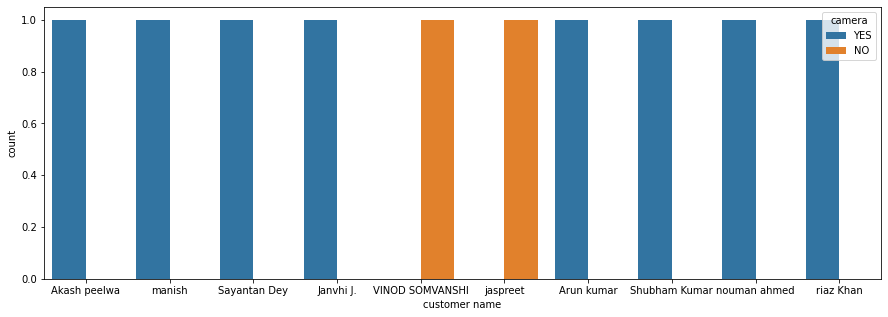

In [107]:
plt.figure(figsize=(15,5))
sns.countplot(x='customer name', hue='camera', data=train)

# wordcloud in reviews column

Text(0.5, 1.0, 'Common 15 words')

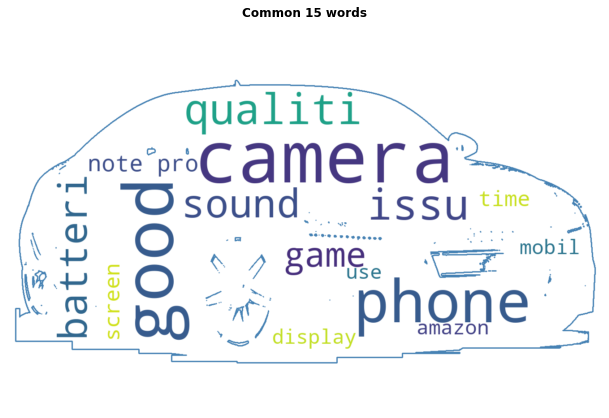

In [110]:
from wordcloud import WordCloud
from PIL import Image # for world cloud image
long_string = ','.join(list(train.reviews_norm.values))
# Import the image of a car to have it as mask
car_mask = np.array(Image.open("audi_cloud.png"))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", mask=car_mask, max_words=15, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
plt.figure(figsize= (20,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("Common 15 words", pad = 14, weight = 'bold')


# Now let's take a kaggle dataset:
#### https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline

from bs4 import BeautifulSoup  
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag

import logging
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K
from keras.layers.embeddings import Embedding

Using TensorFlow backend.
C:\Users\DELL\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DELL\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DELL\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\DELL\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

In [22]:
# Load csv file
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [23]:
print("\nTotal number of reviews: ",len(df))
print("\nTotal number of brands: ", len(list(set(df['Brand Name']))))
print("\nTotal number of unique products: ", len(list(set(df['Product Name']))))

print("\nPercentage of reviews with neutral sentiment : {:.2f}%"\
      .format(df[df['Rating']==3]["Reviews"].count()/len(df)*100))
print("\nPercentage of reviews with positive sentiment : {:.2f}%"\
      .format(df[df['Rating']>3]["Reviews"].count()/len(df)*100))
print("\nPercentage of reviews with negative sentiment : {:.2f}%"\
      .format(df[df['Rating']<3]["Reviews"].count()/len(df)*100))


Total number of reviews:  413840

Total number of brands:  385

Total number of unique products:  4410

Percentage of reviews with neutral sentiment : 7.68%

Percentage of reviews with positive sentiment : 68.86%

Percentage of reviews with negative sentiment : 23.45%


In [24]:
print("Summary statistics of numerical features : \n", df.describe())

Summary statistics of numerical features : 
                Price         Rating   Review Votes
count  407907.000000  413840.000000  401544.000000
mean      226.867155       3.819578       1.507237
std       273.006259       1.548216       9.163853
min         1.730000       1.000000       0.000000
25%        79.990000       3.000000       0.000000
50%       144.710000       5.000000       0.000000
75%       269.990000       5.000000       1.000000
max      2598.000000       5.000000     645.000000


Text(0, 0.5, 'Count')

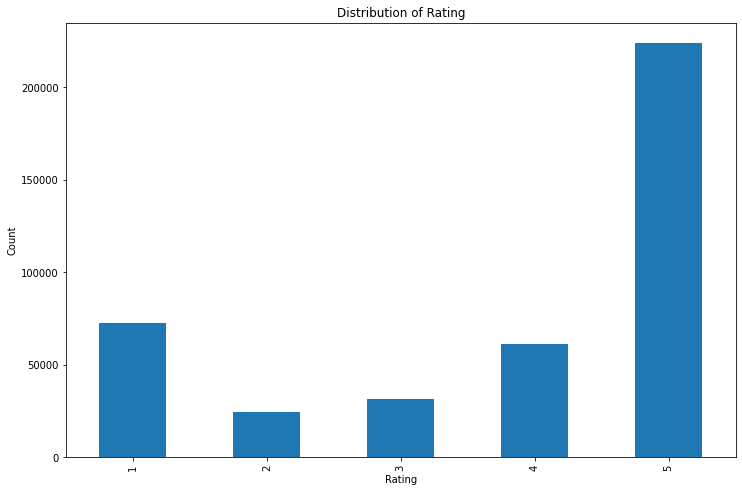

In [25]:
# Plot distribution of rating
plt.figure(figsize=(12,8))
# sns.countplot(df['Rating'])
df['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0.5, 1.0, 'Number of Reviews for Top 20 Brands')

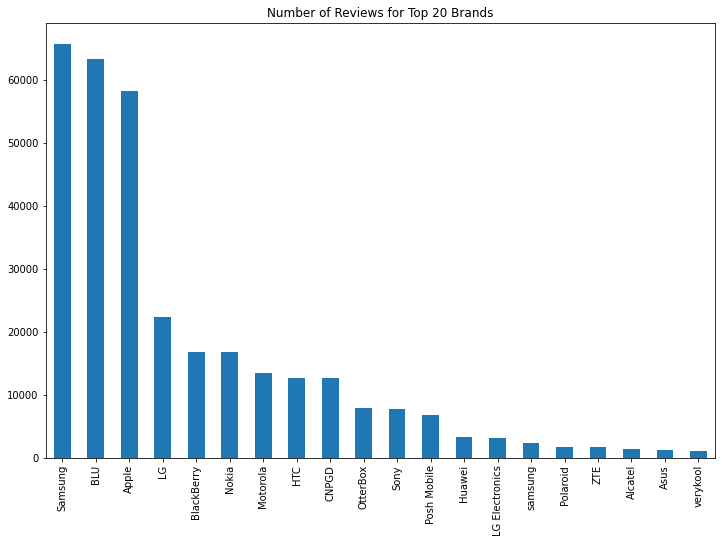

In [26]:
# Plot number of reviews for top 20 brands
brands = df["Brand Name"].value_counts()
# brands.count()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Brands")

# Top 10 brands in the data set sorted on the basis of sum of Ratings.

In [27]:
info = pd.pivot_table(df,index=['Brand Name'],values=['Rating', 'Review Votes'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
info = info.sort_values(by=('sum', 'Rating'), ascending = False)

info.head(20)

sum                   mean             
                Rating Review Votes    Rating Review Votes
Brand Name                                                
Samsung         260513        97903  3.962356     1.530069
BLU             239853        58430  3.792262     0.952792
Apple           228346       112280  3.924415     1.998149
LG               86114        23070  3.841460     1.061178
Nokia            64187        25964  3.819291     1.600148
BlackBerry       63126        21114  3.741465     1.279326
Motorola         51157        23107  3.812849     1.777051
HTC              44094        12803  3.465420     1.035506
CNPGD            39176        20151  3.106002     1.638026
OtterBox         35022         2276  4.383778     0.288759
Sony             30590        12704  3.907767     1.672459
Posh Mobile      24570        12640  3.631929     1.939840
Huawei           14280         8552  4.294737     2.718373
LG Electronics   12635         2484  4.069243     0.816032
samsung           9855         2882  4.053887     1.228474
ZTE               6831         5698  4.092870     3.523810
Alcatel           5721         3174  4.045969     2.300000
Polaroid          5152         2395  2.979757     1.483891
Asus              5109         1715  3.858761     1.326373
verykool          4192         1565  3.626298     1.408641

Text(0.5, 1.0, 'Number of Reviews for Top 20 Products')

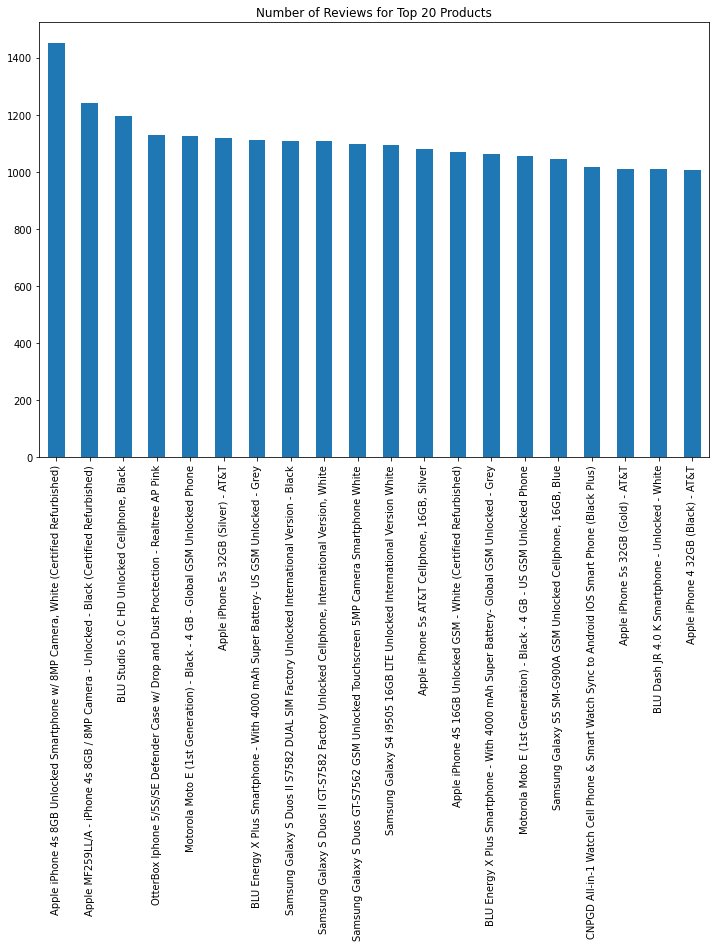

In [28]:
# Plot number of reviews for top 20 products
products = df["Product Name"].value_counts()
plt.figure(figsize=(12,8))
products[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Products")

Text(0, 0.5, 'Count')

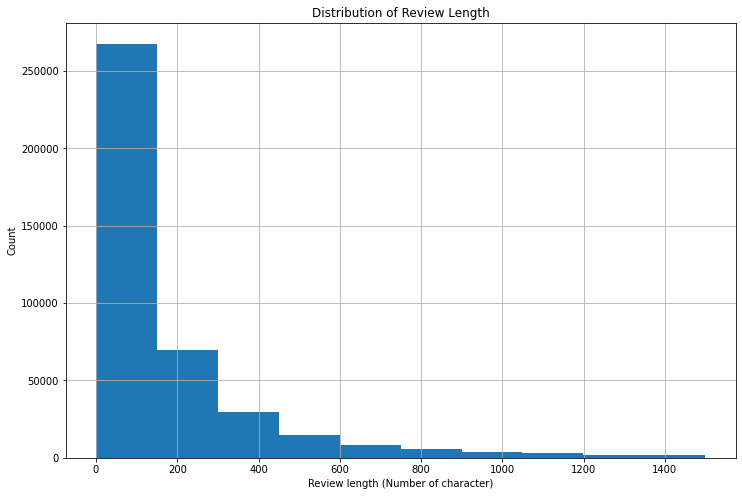

In [29]:
# Plot distribution of review length
review_length = df["Reviews"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

# correlation

In [30]:
corr_matrix = df.corr()
corr_matrix["Rating"].sort_values(ascending = False)

Rating          1.000000
Price           0.074767
Review Votes   -0.050303
Name: Rating, dtype: float64

#### It is observed that Rating has a NEGATIVE CORRELATION with Review Votes

In [31]:
corr_matrix = df.corr()
corr_matrix["Price"].sort_values(ascending = False)

Price           1.000000
Rating          0.074767
Review Votes    0.021903
Name: Price, dtype: float64

#### It is observed that Rating has a POSITIVE CORRELATION with Price

# Data Preparation

# Prepare Data

In [32]:
df = df.sample(frac=0.1, random_state=0) #uncomment to use full set of data
# Drop missing values
df.dropna(inplace=True)
# Remove any 'neutral' ratings equal to 3
df = df[df['Rating'] != 3]
# Encode 4s and 5s as 1 (positive sentiment) and 1s and 2s as 0 (negative sentiment)
df['Sentiment'] = np.where(df['Rating'] > 3, 1, 0)
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiment
134801,BLU Studio 5.0 C HD - Unlocked Cell Phones - R...,BLU,2000.00,5,"For the price I paid for this devices, its fan...",0.0,1
123493,Blu LIFE 8 Unlocked (Pink),BLU,199.98,5,love love love it....good buy...recommend to a...,0.0,1
335592,Samsung Galaxy S Duos II S7582 DUAL SIM Factor...,Samsung,299.99,4,Good,0.0,1
246353,"Motorola Droid 2 A955 Verizon Phone 5MP Cam, W...",Motorola,82.00,1,Not good. Returned first phone and they sent m...,0.0,0
273324,Nokia Lumia 920 32GB Unlocked GSM 4G LTE Windo...,Nokia,149.35,4,Met expectations! I'm very satisfied!Even arri...,1.0,1


# Train Test Split

In [33]:
# Split data into training set and validation
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], df['Sentiment'], \
                                                    test_size=0.1, random_state=0)

print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))
print('Show a review in the training set : \n', X_train.iloc[10])

Load 27799 training examples and 3089 validation examples. 

Show a review in the training set : 
 good product and fast shipping. thank you.


# Bag of Words

# Text Preprocessing

In [34]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 
    
    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True: # stemming
#         stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:  # split text
        return (words)
    
    return( " ".join(words)) 

In [35]:
# Preprocess text data in training set and validation set
X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])
    
for d in X_test:
    X_test_cleaned.append(cleanText(d))

C:\Users\DELL\Anaconda3\lib\site-packages\bs4\__init__.py:336: UserWarning: "http://www.amazon.com/gp/product/B013YDFH3Y?redirect=true&ref_=cm_cr_ryp_prd_ttl_sol_0" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\DELL\Anaconda3\lib\site-packages\bs4\__init__.py:336: UserWarning: "https://www.amazon.com/dp/B00K15KRV6/ref=cm_cr_ryp_prd_ttl_sol_22" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\DELL\Anaconda3\lib\site-packages\bs4\__init__.py:336: UserWarning: "http://www.amazon.com/gp/product/B0193D539M?redirect=true&ref_=cm_cr_ryp_prd_ttl_sol_0" looks like a URL. Beautiful Soup is not an

Show a cleaned review in the training set : 
 good product and fast shipping thank you


# Evaluation metric

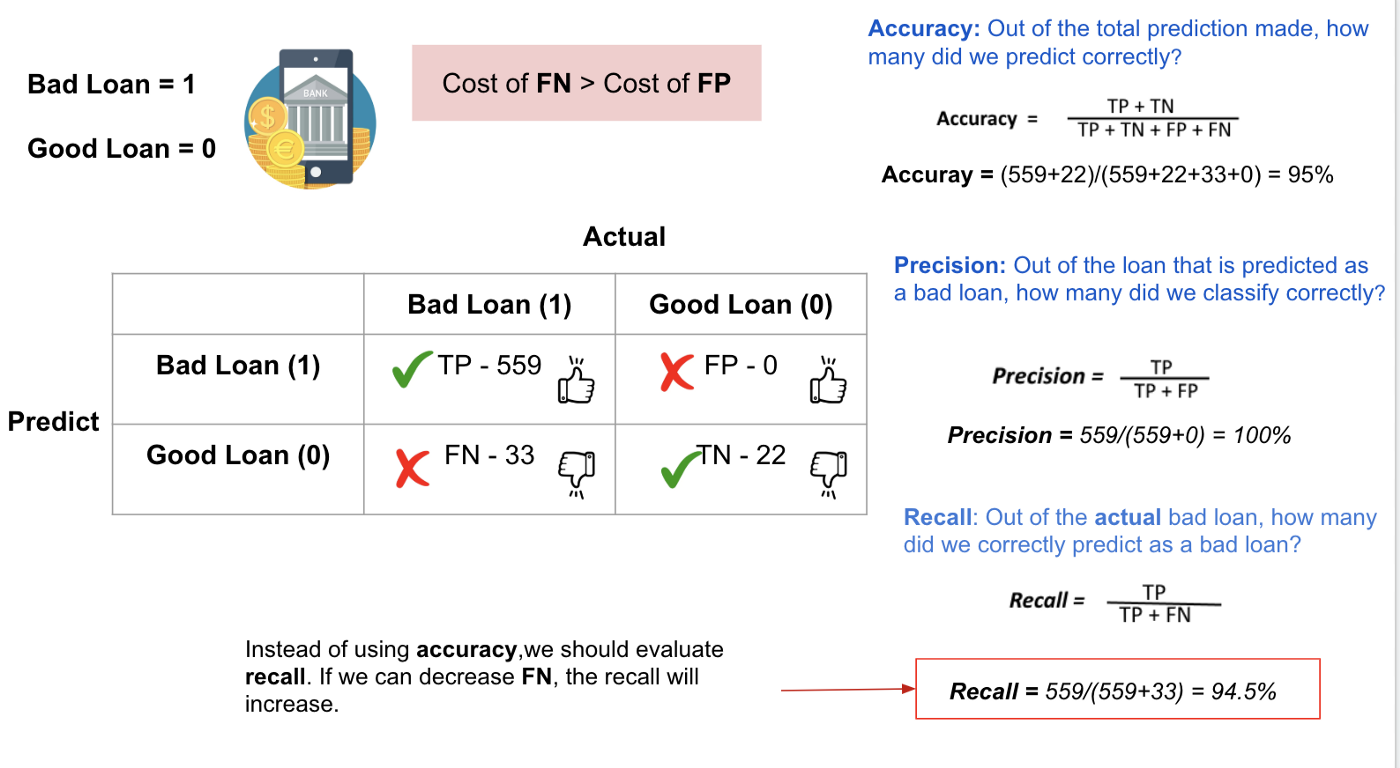

# CountVectorizer with Multinomial Naive Bayes (Benchmark Model)

In [36]:
# Fit and transform the training data to a document-term matrix using CountVectorizer
countVect = CountVectorizer() 
X_train_countVect = countVect.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(countVect.get_feature_names())) #6378 
print("Show some feature names : \n", countVect.get_feature_names()[::1000])


# Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(X_train_countVect, y_train)

Number of features : 19607 

Show some feature names : 
 ['aa', 'areable', 'boot', 'clean', 'crushing', 'distortions', 'excatly', 'frills', 'heart', 'inverter', 'lolit', 'movie', 'over', 'predictable', 'reconnecting', 'scaling', 'soldto', 'tapped', 'ubuntu', 'wedges']


MultinomialNB()

In [37]:
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [38]:
# Evaluate the model on validaton set
predictions = mnb.predict(countVect.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.9184

AUC score : 0.8790

Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.80      0.83       778
           1       0.93      0.96      0.95      2311

    accuracy                           0.92      3089
   macro avg       0.90      0.88      0.89      3089
weighted avg       0.92      0.92      0.92      3089


Confusion Matrix : 
 [[ 622  156]
 [  96 2215]]


# TfidfVectorizer with Logistic Regression

In [39]:
# Fit and transform the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train)
print("Number of features : %d \n" %len(tfidf.get_feature_names())) #1722
print("Show some feature names : \n", tfidf.get_feature_names()[::1000])

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

Number of features : 5987 

Show some feature names : 
 ['00', 'changing', 'fall', 'letting', 'primarily', 'stars']


LogisticRegression()

In [40]:
# Look at the top 10 features with smallest and the largest coefficients
feature_names = np.array(tfidf.get_feature_names())
sorted_coef_index = lr.coef_[0].argsort()
print('\nTop 10 features with smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Top 10 features with largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))


Top 10 features with smallest coefficients :
['not' 'return' 'disappointed' 'waste' 'horrible' 'worst' 'poor' 'slow'
 'stopped' 'doesn']

Top 10 features with largest coefficients : 
['great' 'love' 'excellent' 'perfect' 'good' 'easy' 'best' 'far' 'amazing'
 'awesome']


In [41]:
# Evaluate on the validaton set
predictions = lr.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.9310

AUC score : 0.8985

Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       778
           1       0.94      0.96      0.95      2311

    accuracy                           0.93      3089
   macro avg       0.92      0.90      0.91      3089
weighted avg       0.93      0.93      0.93      3089


Confusion Matrix : 
 [[ 648  130]
 [  83 2228]]


# Word Cloud

In [43]:
def create_word_cloud(brand, sentiment):
    try: 
        df_brand = df.loc[df['Brand Name'].isin([brand])]
        df_brand_sample = df_brand.sample(frac=0.1)
        word_cloud_collection = ''
        
        if sentiment == 1:
            df_reviews = df_brand_sample[df_brand_sample["Sentiment"]==1]["Reviews"]
            
        if sentiment == 0:
            df_reviews = df_brand_sample[df_brand_sample["Sentiment"]==0]["Reviews"]
            
        for val in df_reviews.str.lower():
            tokens = nltk.word_tokenize(val)
            tokens = [word for word in tokens if word not in stopwords.words('english')]
            for words in tokens:
                word_cloud_collection = word_cloud_collection + words + ' '

        wordcloud = WordCloud(max_font_size=50, width=500, height=300).generate(word_cloud_collection)
        plt.figure(figsize=(10,8))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
    except: 
        pass

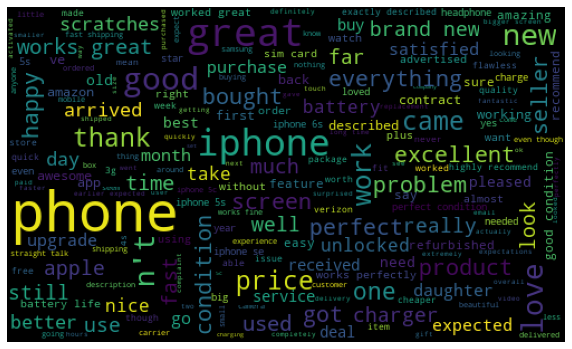

In [44]:
create_word_cloud(brand='Apple', sentiment=1)

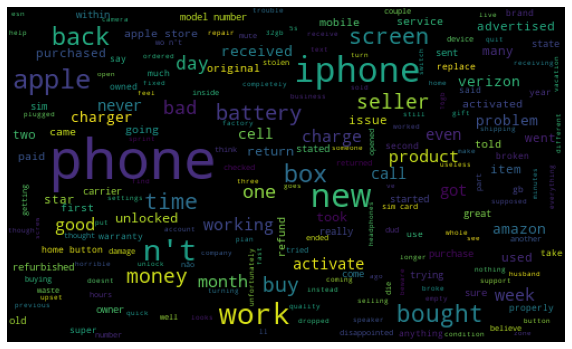

In [45]:
create_word_cloud(brand='Apple', sentiment=0)